In [16]:
#Importing Data from GitHub
import pandas as pd
url = 'https://raw.githubusercontent.com/xandercoomes/USGS-Correlation/main/BigSurShorelineAnalysis.xlsx%20-%20RawData(No%20Nan).csv'
df = pd.read_csv(url)
from mpl_toolkits.mplot3d import Axes3D

#interacting graphing
%matplotlib widget

In [17]:
#set up figure size and DPI(dots per inch: resolution) for screen demo
plt.rcParams['figure.figsize']=(6,4)
plt.rcParams['figure.dpi']=150

Text(0.5, 0, 'Transect 1 Distance (m)')

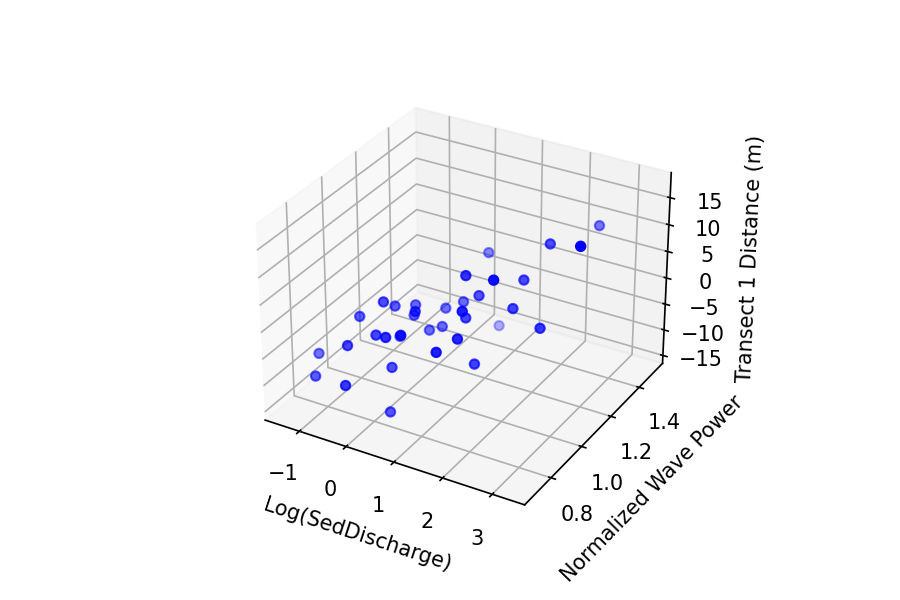

In [18]:
#Add a 3D Scatterplot
fig = plt.figure() 
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df['logsedisch'],df['Normalized WavePower'],df['1'], color = 'blue')
ax.set_xlabel('Log(SedDischarge)')
ax.set_ylabel('Normalized Wave Power')
ax.set_zlabel('Transect 1 Distance (m)')

solution:
4.406720 x + -0.419893 y + -3.230738 = z
errors:
[[  6.69437439]
 [  6.60709522]
 [  1.15738538]
 [ -1.71225074]
 [ -2.87595922]
 [  2.4935277 ]
 [  2.55785487]
 [ -2.93715176]
 [ -8.75886432]
 [  2.26064861]
 [  0.70124686]
 [ -1.18291087]
 [  6.07572312]
 [  1.55986966]
 [  3.97312655]
 [ -2.84682477]
 [ -0.74373911]
 [ -3.16581598]
 [ -0.82615366]
 [  3.33749732]
 [ -1.94400389]
 [  0.83779227]
 [  4.97713801]
 [  2.3153887 ]
 [ -2.21504871]
 [  4.38397565]
 [  2.34680671]
 [  4.1861652 ]
 [  0.62729241]
 [ -1.50439805]
 [-12.01672208]
 [-11.36672802]
 [  6.4176922 ]
 [  2.3182012 ]
 [ -7.2120854 ]
 [ -4.52014546]]
residual:
27.727074434202876


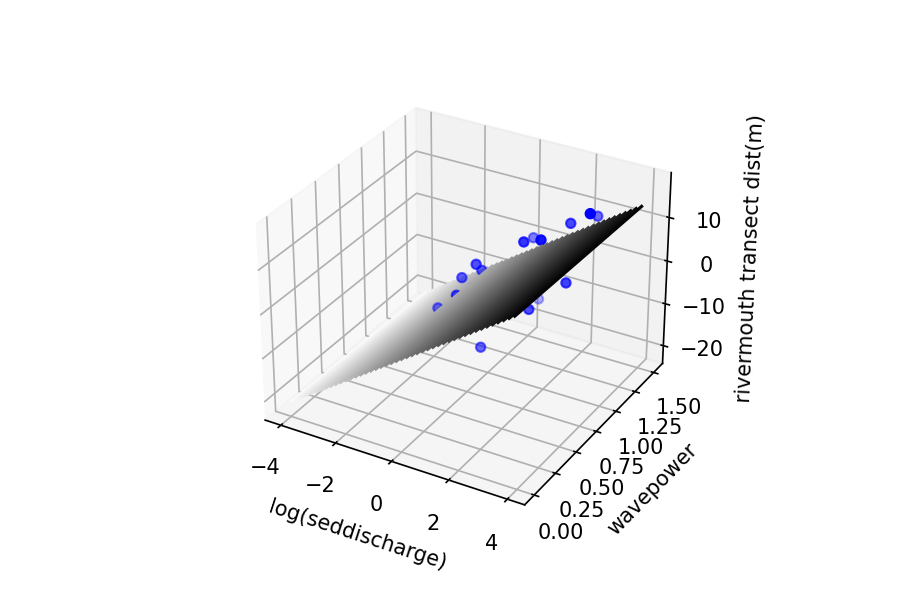

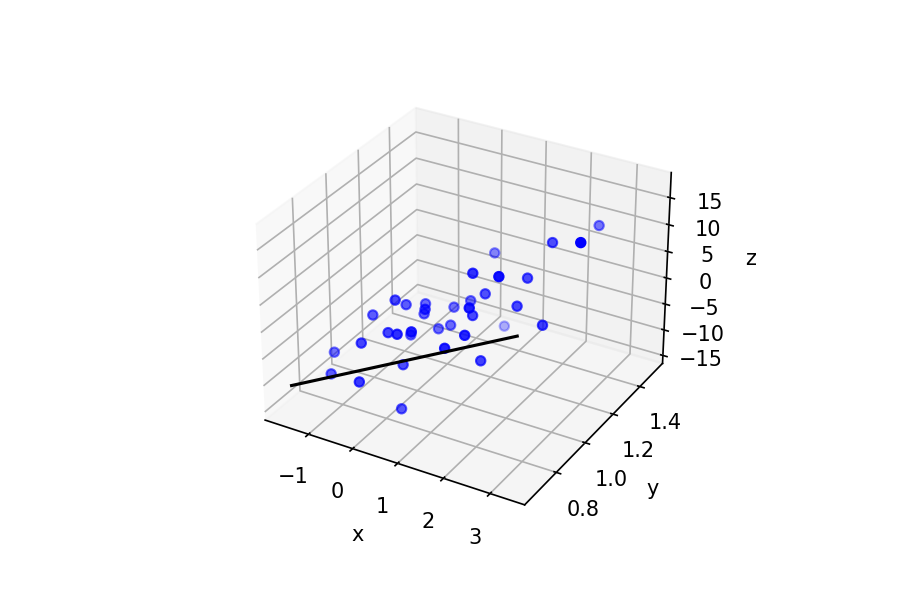

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


# create random data
xs = df['logsedisch']
ys = df['Normalized WavePower']
zs = df['1']



# plot raw data
plt.figure()
ax = plt.subplot(111, projection='3d')
ax.scatter(xs, ys, zs, color='b')

# do fit
tmp_A = []
tmp_b = []
for i in range(len(xs)):
    tmp_A.append([xs[i], ys[i], 1])
    tmp_b.append(zs[i])
b = np.matrix(tmp_b).T
A = np.matrix(tmp_A)
fit = (A.T * A).I * A.T * b
errors = b - A * fit
residual = np.linalg.norm(errors)

print("solution:")
print("%f x + %f y + %f = z" % (fit[0], fit[1], fit[2]))
print("errors:")
print(errors)
print("residual:")
print(residual)

# plot plane
xlim = ax.get_xlim()
ylim = ax.get_ylim()
X,Y = np.meshgrid(np.arange(xlim[0], xlim[1]),
                  np.arange(ylim[0], ylim[1]))
Z = np.zeros(X.shape)
for r in range(X.shape[0]):
    for c in range(X.shape[1]):
        Z[r,c] = fit[0] * X[r,c] + fit[1] * Y[r,c] + fit[2]
ax.plot_wireframe(X,Y,Z, color='k')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

x = np.linspace(-4, 4, 30)
y = np.linspace(0, 1.5, 30)

X, Y = np.meshgrid(x, y)
Z = 4.4*X-0.419*Y-3.23

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('log(seddischarge)')
ax.set_ylabel('wavepower')
ax.set_zlabel('rivermouth transect dist(m)');
ax.scatter(xs, ys, zs, color='b')

plt.show()
#https://stackoverflow.com/questions/1400213/3d-least-squares-plane
#https://stackoverflow.com/questions/1400213/3d-least-squares-plane